# Generalized Autoregressive Conditional Heteroskedasticity.(GARCH)

##### The ARCH model is a statistical model for time series data that desribes the variance of a period t (current period) error term or innovation as a function of the actual sizes of the previous time periods' error terms. Often the variance is related to the square of previous innovations. The ARCH model is appropriate when the variance of the error term follows an AR process. However if the if an ARMA process is assummed to the error variance, then the model is a GARCH.

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from arch import arch_model
import statistics as sm
%matplotlib inline

In [4]:
#Let's import the data set
df1=pd.read_csv("C.csv",parse_dates=["T"], index_col=["T"])
df1.head()


,A,E,U,J
T,,,,
2000-01-03,1.5172,0.9847,0.6146,101.70
2000-01-04,1.5239,0.9700,0.6109,103.09
2000-01-05,1.5267,0.9676,0.6092,103.77
2000-01-06,1.5291,0.9686,0.6070,105.19
2000-01-07,1.5272,0.9714,0.6104,105.17


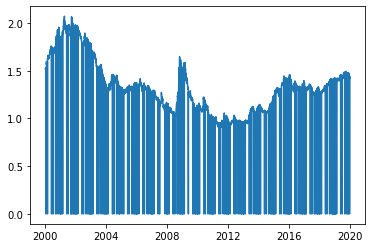

In [5]:
#Again lets take a look at the data.
pyplot.plot(df1["A"])
pyplot.show()

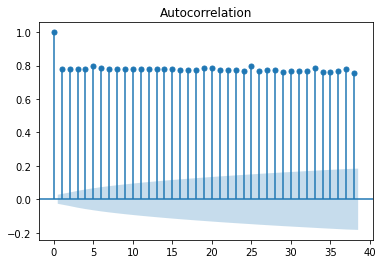

In [6]:
#autocorellation plot
squared_data=df1["A"]**2
plot_acf(squared_data)
pyplot.show()

#### Auto Regressive Conditional Heteroskedasticity. (ARCH)

#Let's split the data series into training and test data.Here we have split the data into a training(2/3 of data) and a test set(1/3)of the data set

In [7]:
train, test = df1.A[0:3748], df1.A[3748:-1]
# define model
model = arch_model(train, mean='Zero', vol='ARCH', p=15)
# fit model
model_fit = model.fit()
# forecast the test set
yhat = model_fit.forecast(horizon=5217)

Iteration:      1,   Func. Count:     18,   Neg. LLF: 9216.473422401676
Iteration:      2,   Func. Count:     38,   Neg. LLF: 25740.176686270734
Iteration:      3,   Func. Count:     56,   Neg. LLF: 6262.473163466297
Iteration:      4,   Func. Count:     74,   Neg. LLF: 6254.762262115972
Iteration:      5,   Func. Count:     92,   Neg. LLF: 6252.776842774501
Iteration:      6,   Func. Count:    110,   Neg. LLF: 6291.07755221491
Iteration:      7,   Func. Count:    128,   Neg. LLF: 6255.755938897417
Iteration:      8,   Func. Count:    146,   Neg. LLF: 6245.919090675264
Iteration:      9,   Func. Count:    164,   Neg. LLF: 6249.891043885798
Iteration:     10,   Func. Count:    182,   Neg. LLF: 6242.393818961992
Iteration:     11,   Func. Count:    200,   Neg. LLF: 6242.262705637111
Iteration:     12,   Func. Count:    218,   Neg. LLF: 6240.156963004818
Iteration:     13,   Func. Count:    236,   Neg. LLF: 6242.706486795618
Iteration:     14,   Func. Count:    254,   Neg. LLF: 6240.43299

In [9]:
#Just taking a look at the sub dataset
df1.describe()
#d.mean(axis = 1, skipna = True)

,A,E,U,J
count,5217.000000,5217.000000,5217.000000,5217.000000
mean,1.281462,0.811876,0.616068,102.544723
std,0.367267,0.203679,0.146769,24.141168
min,0.000000,0.000000,0.000000,0.000000
25%,1.094700,0.743700,0.569200,97.860000
50%,1.305300,0.811200,0.633500,108.620000
75%,1.424300,0.897300,0.690200,116.440000
max,2.071300,1.209200,0.828700,134.770000


## GARCH

Iteration:      1,   Func. Count:     19,   Neg. LLF: 1870651454.7735384
Iteration:      2,   Func. Count:     40,   Neg. LLF: 15175.126311529131
Iteration:      3,   Func. Count:     59,   Neg. LLF: 6544.316902733494
Iteration:      4,   Func. Count:     78,   Neg. LLF: 15281.005320269942
Iteration:      5,   Func. Count:     97,   Neg. LLF: 6254.247337757135
Iteration:      6,   Func. Count:    116,   Neg. LLF: 6259.720966039127
Iteration:      7,   Func. Count:    135,   Neg. LLF: 6241.934064762114
Iteration:      8,   Func. Count:    154,   Neg. LLF: 6282.244864865928
Iteration:      9,   Func. Count:    174,   Neg. LLF: 6247.834022111812
Iteration:     10,   Func. Count:    193,   Neg. LLF: 6238.570262547218
Iteration:     11,   Func. Count:    212,   Neg. LLF: 6238.3425552808985
Iteration:     12,   Func. Count:    231,   Neg. LLF: 6238.423832667841
Iteration:     13,   Func. Count:    250,   Neg. LLF: 6238.170413600919
Iteration:     14,   Func. Count:    269,   Neg. LLF: 6238.0

<function matplotlib.pyplot.show(close=None, block=None)>

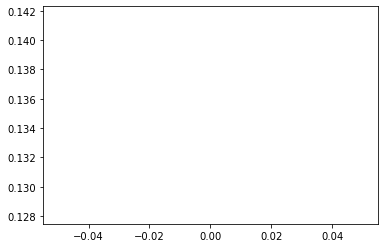

In [11]:
train, test = df1.A[0:3748], df1.A[3748:-1]
# define model
model1 = arch_model(train, mean="Zero", vol='GARCH', p=15)
# fit model
model1_fit = model1.fit()
# forecast the test set
yhat = model1_fit.forecast(horizon=len(df1["A"]))
#variance=sm.variance(df1["A"])
#pyplot.plot(variance)
#pyplot.show

In [12]:
#fitting model results
eps = np.zeros_like(df1.A[0:100])
am = arch_model(eps)
res = am.fit(update_freq=1)
print(res.summary())

Iteration:      1,   Func. Count:     11,   Neg. LLF: nan
Inequality constraints incompatible    (Exit mode 4)
            Current function value: nan
            Iterations: 1
            Function evaluations: 11
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                         nan
Mean Model:             Constant Mean   Adj. R-squared:                    nan
Vol Model:                      GARCH   Log-Likelihood:                    nan
Distribution:                  Normal   AIC:                               nan
Method:            Maximum Likelihood   BIC:                               nan
                                        No. Observations:                  100
Date:                Mon, Dec 21 2020   Df Residuals:                       96
Time:                        07:46:42   Df Model:                            4
                               Mean Mod

C:\Users\Rodgers\Anaconda3\lib\site-packages\arch\univariate\mean.py:559: RuntimeWarning: invalid value encountered in double_scalars
  return 1.0 - e.T.dot(e) / y.dot(y)
C:\Users\Rodgers\Anaconda3\lib\site-packages\arch\univariate\base.py:318: RuntimeWarning: divide by zero encountered in log
  loglikelihood -= 0.5 * nobs * np.log(sigma2)
C:\Users\Rodgers\Anaconda3\lib\site-packages\arch\univariate\volatility.py:1112: RuntimeWarning: invalid value encountered in double_scalars
  scale = np.mean(resids ** 2) / (target ** (2.0 / power))
C:\Users\Rodgers\Anaconda3\lib\site-packages\arch\univariate\base.py:711: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning,
C:\Users\Rodgers\Anaconda3\lib\site-packages\arch\univariate\mean.py:559: RuntimeWarning: invalid value encountered in double_scalars
  return 1.0 - e.T.dot(e) / y.dot(y)
C:\Users\Rodgers\Anaconda3\lib\site-pac